# Model outputs

In [1]:
import numpy as np
import xarray as xr
import ipywidgets as widgets
%matplotlib inline

In [10]:
# no tripods simulation
# ds = xr.open_mfdataset('/data/output/johnston_draw/devel/wy2009/jd_no_tripods/data/data0024_5759/smrfOutputs/*.nc')

# maxus_20_300 simulation
ds = xr.open_mfdataset('/data/output/johnston_draw/devel/wy2009/maxus_20_300/data/data0024_5759/smrfOutputs/*.nc')
# ds = xr.open_mfdataset('/data/output/johnston_draw/devel/wy2009/maxus_20_300/runs/run0024_5759/*.nc')

# wind_no_125 simulation
# ds = xr.open_mfdataset('/data/output/johnston_draw/devel/wy2009/wind_no_125/data/data0024_5759/smrfOutputs/*.nc')
# ds = xr.open_mfdataset('/data/output/johnston_draw/devel/wy2009/wind_no_125/runs/run0024_5759/*.nc')

ds

<xarray.Dataset>
Dimensions:          (time: 5736, x: 225, y: 157)
Coordinates:
  * time             (time) datetime64[ns] 2008-10-02 ... 2009-05-28T23:00:00
  * y                (y) float32 4775710.0 4775700.0 ... 4774160.0 4774150.0
  * x                (x) float32 516030.0 516040.0 ... 518260.0 518270.0
Data variables:
    air_temp         (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    projection       |S1 b''
    net_solar        (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    percent_snow     (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    precip           (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    precip_temp      (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    snow_density     (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    thermal          (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    vapor_pressure   (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    veg_ir_beam      (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    veg_ir_diffuse   (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    veg_vis_beam     (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    veg_vis_diffuse  (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    wind_direction   (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
    wind_speed       (time, y, x) float32 dask.array<chunksize=(5736, 157, 225), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.6
    dateCreated:    2020-11-25 18:09:50
    title:          Distirbuted Air temperature data from SMRF
    history:        [2020-11-25 18:09:50] Create netCDF4 file
    institution:    USDA Agricultural Research Service, Northwest Watershed R...
    references:     Online documentation smrf.readthedocs.io; https://doi.org...
    source:         SMRF v0.9.3
    last_modified:  [2020-11-25 20:44:22] Data added or updated

In [11]:
# plot of the data with time slider
times = list(ds.time.dt.strftime("%Y-%m-%d %H:%M:%S").values)

date_select_slider = widgets.SelectionSlider(
    options=times,
    layout={'width': '500px'},
    orientation='horizontal',
    readout=True
)

variable_dropdown = widgets.Dropdown(
    options=list(ds.keys())
)

def display_data(variable, date_time):
    ds.sel(time=date_time)[variable].plot(
#         vmax=15,
        figsize=(20,10),
        aspect='equal'
    )

%matplotlib inline
widgets.interact(
    display_data,
    variable=variable_dropdown,
    date_time=date_select_slider
)

interactive(children=(Dropdown(description='variable', options=('air_temp', 'projection', 'net_solar', 'percen…

<function __main__.display_data(variable, date_time)>

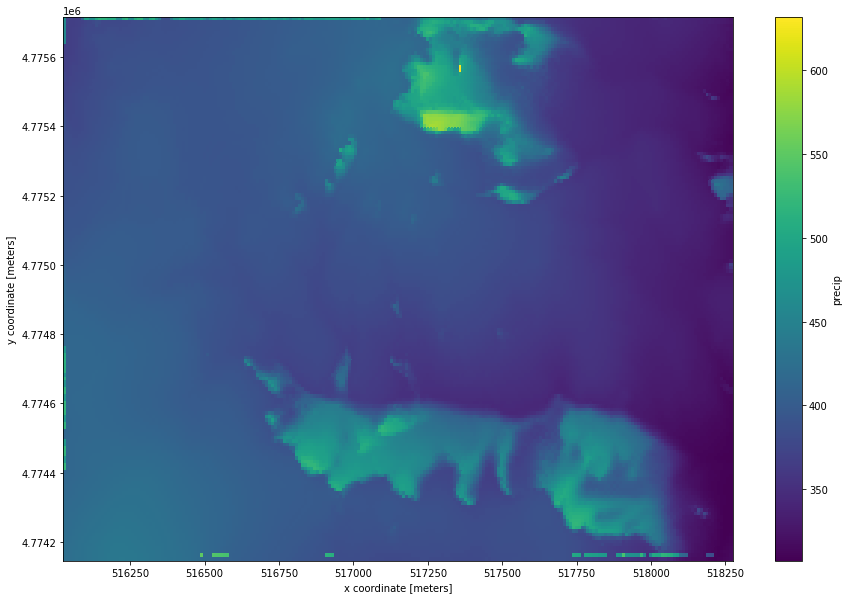

In [5]:
ds.precip.sum(dim='time').plot(figsize=(15,10))